In [1]:
import numpy as np
x_train0=np.load('C:/MLDL/npy/granulation/x_train_granulation.npy')/255.
y_train0=np.load('C:/MLDL/npy/granulation/y_train_granulation.npy')
x_val0=np.load('C:/MLDL/npy/granulation/x_val_granulation.npy')/255.
y_val0=np.load('C:/MLDL/npy/granulation/y_val_granulation.npy')
x_train1=np.load('C:/MLDL/npy/slough/x_train_slough.npy')/255.
y_train1=np.load('C:/MLDL/npy/slough/y_train_slough.npy')
x_val1=np.load('C:/MLDL/npy/slough/x_val_slough.npy')/255.
y_val1=np.load('C:/MLDL/npy/slough/y_val_slough.npy')
x_train2=np.load('C:/MLDL/npy/necrosis/x_train_necrosis.npy')/255.
y_train2=np.load('C:/MLDL/npy/necrosis/y_train_necrosis.npy')
x_val2=np.load('C:/MLDL/npy/necrosis/x_val_necrosis.npy')/255.
y_val2=np.load('C:/MLDL/npy/necrosis/y_val_necrosis.npy')

x_train=np.concatenate((x_train0,x_train1,x_train2))
y_train=np.concatenate((y_train0,y_train1,y_train2))
x_val=np.concatenate((x_val0,x_val1,x_val2))
y_val=np.concatenate((y_val0,y_val1,y_val2))

In [2]:
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(2274, 31, 31, 3) (2274, 31, 31, 1) (254, 31, 31, 3) (254, 31, 31, 1)


In [3]:
#sigmoid
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5),strides=(2,2), activation='relu', input_shape=(31, 31, 3)), 
    tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),activation='relu'),
    tf.keras.layers.Conv2D(64,(5, 5),strides=(2,2), activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (5, 5),strides=(2,2)),
    tf.keras.layers.Conv2DTranspose(32, (6, 6),strides=(2,2)),
    tf.keras.layers.Conv2DTranspose(16, (5, 5),strides=(2,2)),
    tf.keras.layers.Conv2D(1, 1,strides=1,activation='sigmoid')
                

])

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          12832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          51264     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 5, 5, 64)          102464    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        73760     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 31, 31, 16)        12816     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 1)         1

In [4]:
model.compile(optimizer='adam' #decay0.0001, momentum 0.9?
              , loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.MeanIoU(num_classes=2), 'accuracy'])

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
callback_param = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='auto', min_lr=1e-05)

history = model.fit(x_train, y_train
                    , validation_data=(x_val, y_val)
                    , epochs=100, batch_size=100
                    , callbacks=[callback_param]
                    )

Epoch 1/100
23/23 [==============================] - 6s 244ms/step - loss: 0.6553 - mean_io_u: 0.3251 - accuracy: 0.6430 - val_loss: 0.6270 - val_mean_io_u: 0.3256 - val_accuracy: 0.6510
Epoch 2/100
23/23 [==============================] - 6s 252ms/step - loss: 0.5878 - mean_io_u: 0.3251 - accuracy: 0.6553 - val_loss: 0.5583 - val_mean_io_u: 0.3256 - val_accuracy: 0.7037
Epoch 3/100
23/23 [==============================] - 6s 249ms/step - loss: 0.5258 - mean_io_u: 0.3251 - accuracy: 0.7274 - val_loss: 0.5347 - val_mean_io_u: 0.3256 - val_accuracy: 0.7475
Epoch 4/100
23/23 [==============================] - 5s 228ms/step - loss: 0.4941 - mean_io_u: 0.3251 - accuracy: 0.7577 - val_loss: 0.5324 - val_mean_io_u: 0.3256 - val_accuracy: 0.7245
Epoch 5/100
23/23 [==============================] - 6s 250ms/step - loss: 0.4854 - mean_io_u: 0.3251 - accuracy: 0.7629 - val_loss: 0.5103 - val_mean_io_u: 0.3256 - val_accuracy: 0.7586
Epoch 6/100
23/23 [==============================] - 4s 154ms/ste

Epoch 41/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0927 - mean_io_u: 0.4089 - accuracy: 0.9701 - val_loss: 0.8403 - val_mean_io_u: 0.3815 - val_accuracy: 0.8503
Epoch 42/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0915 - mean_io_u: 0.4120 - accuracy: 0.9693 - val_loss: 0.8641 - val_mean_io_u: 0.3828 - val_accuracy: 0.8464
Epoch 43/100
23/23 [==============================] - 5s 213ms/step - loss: 0.0902 - mean_io_u: 0.4163 - accuracy: 0.9696 - val_loss: 0.8667 - val_mean_io_u: 0.3866 - val_accuracy: 0.8486
Epoch 44/100
23/23 [==============================] - 6s 281ms/step - loss: 0.0879 - mean_io_u: 0.4152 - accuracy: 0.9716 - val_loss: 0.8656 - val_mean_io_u: 0.3879 - val_accuracy: 0.8512
Epoch 45/100
23/23 [==============================] - 5s 206ms/step - loss: 0.0863 - mean_io_u: 0.4194 - accuracy: 0.9721 - val_loss: 0.8915 - val_mean_io_u: 0.3880 - val_accuracy: 0.8474
Epoch 46/100
23/23 [==============================] - ETA: 0

Epoch 82/100
23/23 [==============================] - 4s 175ms/step - loss: 0.0724 - mean_io_u: 0.4470 - accuracy: 0.9772 - val_loss: 0.9999 - val_mean_io_u: 0.4048 - val_accuracy: 0.8476
Epoch 83/100
23/23 [==============================] - 4s 193ms/step - loss: 0.0722 - mean_io_u: 0.4478 - accuracy: 0.9774 - val_loss: 1.0000 - val_mean_io_u: 0.4053 - val_accuracy: 0.8476
Epoch 84/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0720 - mean_io_u: 0.4489 - accuracy: 0.9774 - val_loss: 1.0016 - val_mean_io_u: 0.4056 - val_accuracy: 0.8477
Epoch 85/100
23/23 [==============================] - 5s 199ms/step - loss: 0.0720 - mean_io_u: 0.4494 - accuracy: 0.9774 - val_loss: 1.0049 - val_mean_io_u: 0.4062 - val_accuracy: 0.8477
Epoch 86/100
23/23 [==============================] - 4s 183ms/step - loss: 0.0717 - mean_io_u: 0.4503 - accuracy: 0.9776 - val_loss: 1.0065 - val_mean_io_u: 0.4058 - val_accuracy: 0.8477
Epoch 87/100
23/23 [==============================] - 5s 222

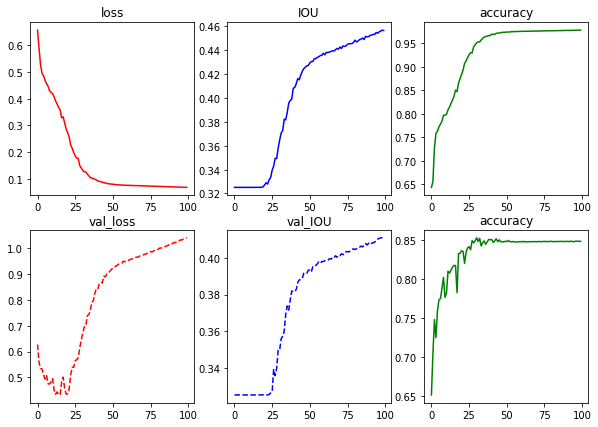

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('IOU')
ax[0, 1].plot(history.history['mean_io_u'], 'b')
ax[0, 2].set_title('accuracy')
ax[0, 2].plot(history.history['accuracy'], 'g')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_IOU')
ax[1, 1].plot(history.history['val_mean_io_u'], 'b--')
ax[1, 2].set_title('accuracy')
ax[1, 2].plot(history.history['val_accuracy'], 'g')

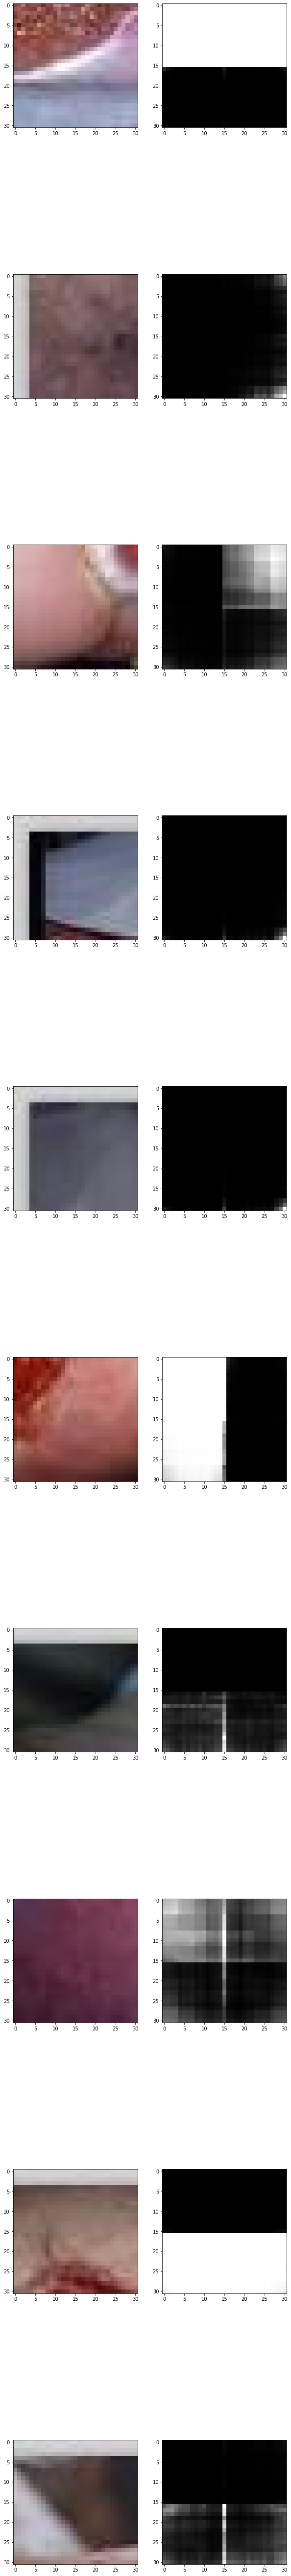

In [8]:
preds_val = model.predict(x_val[:10])

fig, ax = plt.subplots(len(preds_val), 2, figsize=(10, 100))

for i, pred in enumerate(preds_val):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    #ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(pred.squeeze(), cmap='gray')

In [30]:


#이미지 불러오기

test_path = 'C:/MLDL/crop_test_result/necrosis/'
testmask_path = 'C:/MLDL/crop_test_mask_result/necrosis/'
test_list = os.listdir(test_path)
testmask_list = os.listdir(testmask_path)
#X를 uint8로 해야하나
X = np.zeros((len(test_list), 31,31, 3), dtype=np.uint8)
Y = np.zeros((len(testmask_list), 31,31, 1), dtype=np.bool)

for n, name in tqdm(enumerate(test_list), total=len(test_list)):
    path = test_path + name
    img = imread(path)
    img = resize(img, output_shape=(31,31,3), preserve_range=True)
    X[n]=np.array(img)

for n, maskname in tqdm(enumerate(testmask_list), total = len(testmask_list)):
#for n, maskname in enumerate(mask_list):
    path = testmask_path + maskname
    mask=imread(path,as_gray=True)
    mask = resize(mask, output_shape=(31,31,1), preserve_range=True)
    Y[n] = np.array(mask)
    
    

savepath='C:/MLDL/npy_test/necrosis/'
np.save(savepath+'x_test_necrosis', X)
np.save(savepath+'y_test_necrosis', Y)

100%|█████████████████████████████████████████████████████████████████████████████| 4788/4788 [00:28<00:00, 166.81it/s]


In [11]:
import numpy as np
x_test0=np.load('C:/MLDL/npy_test/granulation/x_test_granulation.npy')/255.
y_test0=np.load('C:/MLDL/npy_test/granulation/y_test_granulation.npy')
x_test1=np.load('C:/MLDL/npy_test/slough/x_test_slough.npy')/255.
y_test1=np.load('C:/MLDL/npy_test/slough/y_test_slough.npy')
x_test2=np.load('C:/MLDL/npy_test/necrosis/x_test_necrosis.npy')/255.
y_test2=np.load('C:/MLDL/npy_test/necrosis/y_test_necrosis.npy')
x_test=np.concatenate((x_test0,x_test1,x_test2))
y_test=np.concatenate((y_test0,y_test1,y_test2))

In [12]:
print(x_test.shape,y_test.shape)

(10980, 31, 31, 3) (10584, 31, 31, 1)


In [13]:
evaluation = model.evaluate(x_test[:10584],y_test, batch_size=10)

1059/1059 [==============================] - 15s 14ms/step - loss: 1.4729 - mean_io_u: 0.4081 - accuracy: 0.7289


In [14]:
preds = model.predict(x_test[:10584])
preds[preds>=0.5] = 1
preds[preds<0.5]=0

(array([75.02601625,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

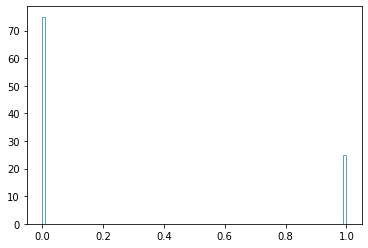

In [15]:
#prediction 값 분포를 보고 threshold 정하기
plt.hist(np.ravel(preds[0], order='C'), bins=100, density=True, alpha=0.7, histtype='step')

In [16]:
m=tf.keras.metrics.MeanIoU(num_classes=2)
m.update_state(y_test,preds)
print(m.result())

tf.Tensor(0.5056691, shape=(), dtype=float32)


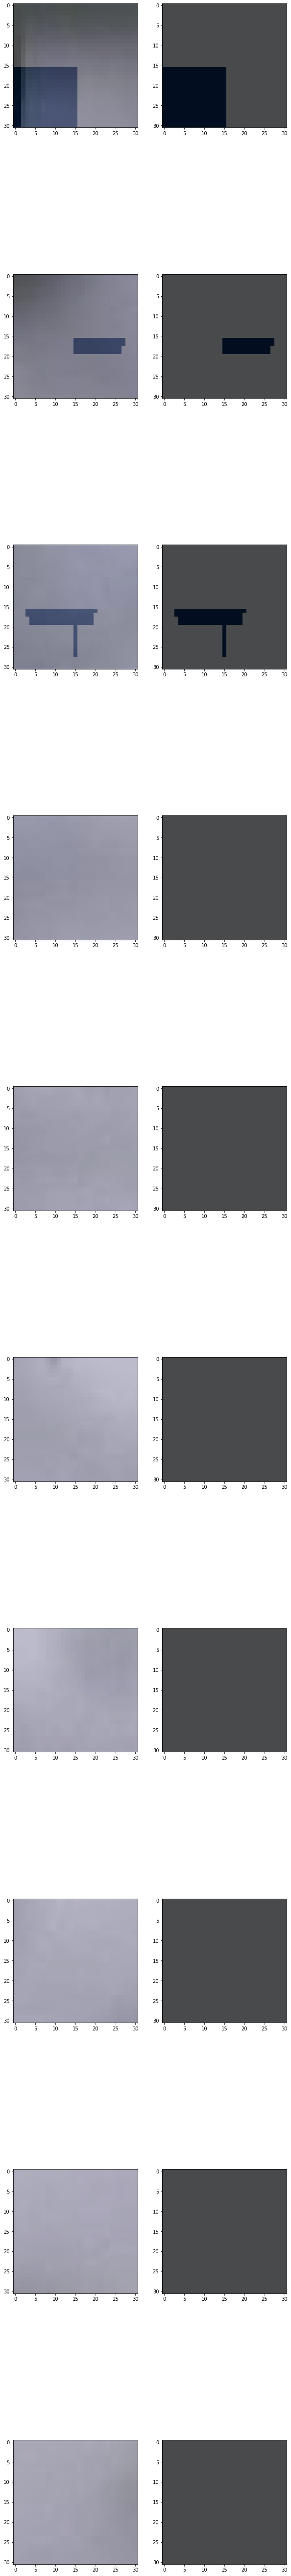

In [17]:
kernel = np.ones((5,5),np.uint8)
fig, ax = plt.subplots(len(x_test[0:10]), 2, figsize=(10, 100))

for i, pred in enumerate(preds[0:10]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 0].imshow(pred.squeeze(), cmap='Blues', alpha=0.3)
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(pred.squeeze(), cmap='Blues', alpha=0.3)
  